# Titanic Survival Prediction

## 1. Import Libraries and Load Data

First, let's import the necessary libraries and load our training and testing datasets.

In [2]:
# Import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np, pandas as pd, re
from sklearn.model_selection import GroupKFold, StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the data
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploratory Data Analysis (EDA)

Now, let's explore the data to understand its structure, find patterns, and identify missing values.

Informations sur le jeu d'entraînement :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Statistiques descriptives :
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838   

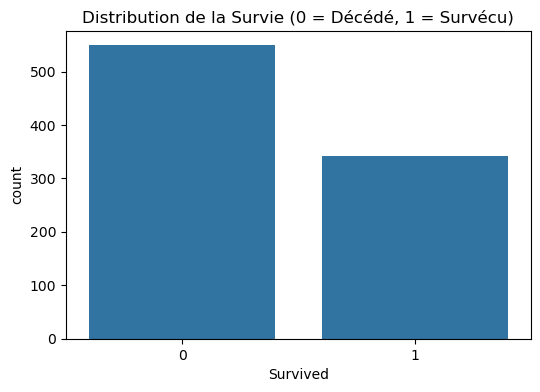

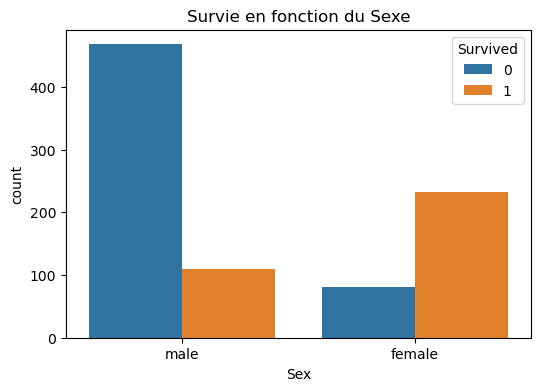

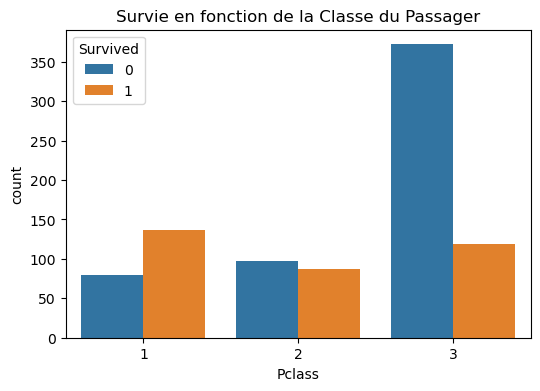

In [4]:
train = pd.read_csv('data/train.csv')
test  = pd.read_csv('data/test.csv')
y = train['Survived'].astype(int)
X = train.drop(columns=['Survived']).copy()




# 1. Obtenir un résumé de base des données (types de colonnes, valeurs non nulles)
print("Informations sur le jeu d'entraînement :")
train_df.info()
print("\n" + "="*40 + "\n")

# 2. Obtenir des statistiques descriptives pour les colonnes numériques
print("Statistiques descriptives :")
print(train_df.describe())
print("\n" + "="*40 + "\n")

# 3. Visualiser le nombre de survivants vs non-survivants
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution de la Survie (0 = Décédé, 1 = Survécu)')
plt.show()

# 4. Visualiser la survie en fonction du sexe
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survie en fonction du Sexe')
plt.show()

# 5. Visualiser la survie en fonction de la classe du passager
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survie en fonction de la Classe du Passager')
plt.show()

Datasets chargés avec succès.
Les datasets ont été combinés. Le nouveau DataFrame a 1309 lignes.

Informations sur les données manquantes dans le dataset combiné :
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Source            0
dtype: int64


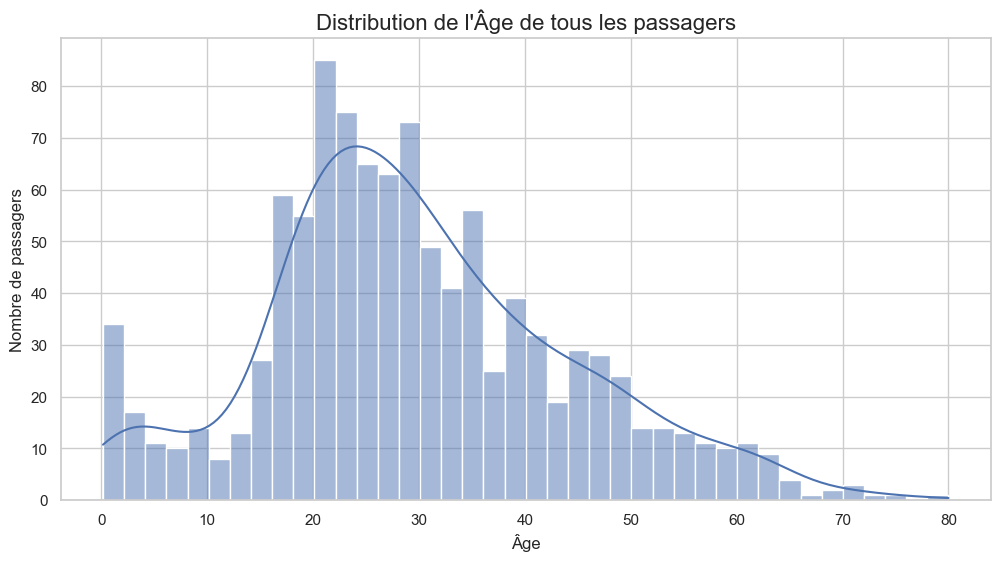

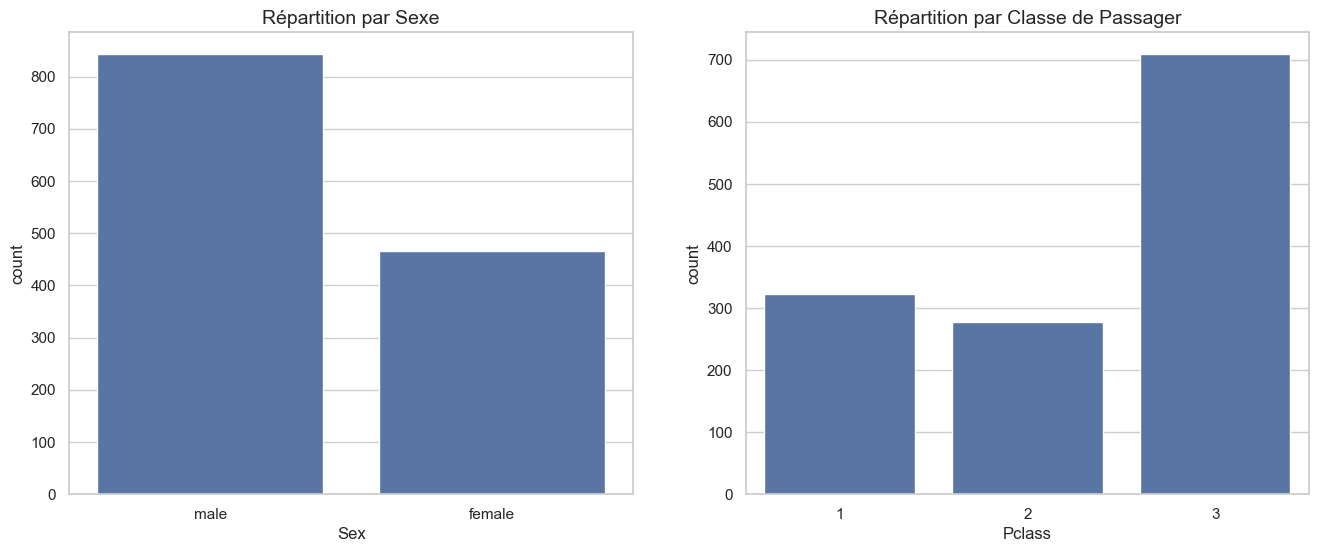

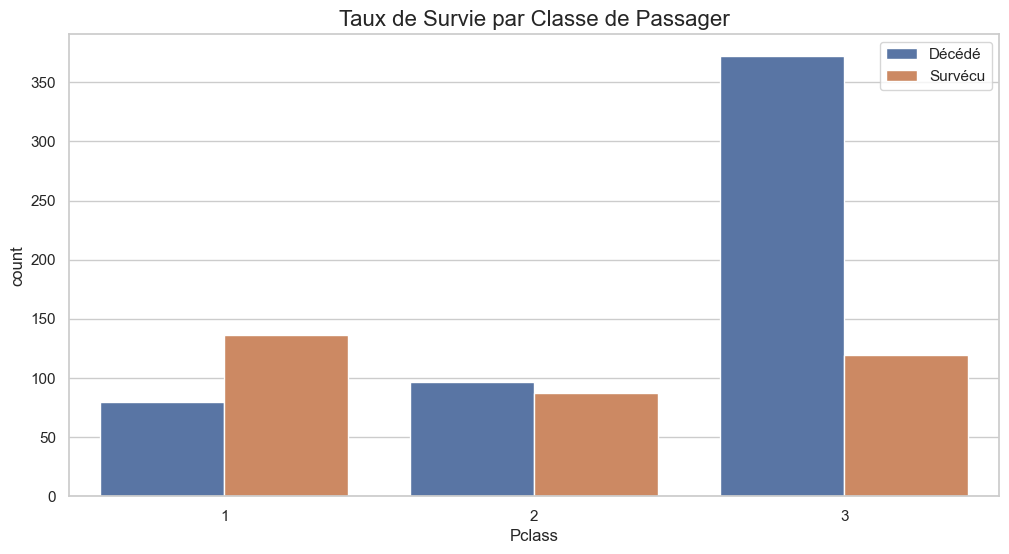

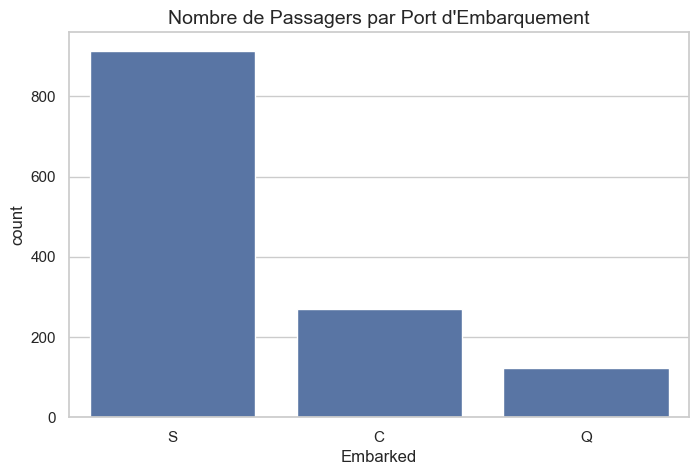

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration du style pour des graphiques plus jolis
sns.set(style='whitegrid')

# 1. Charger les datasets initiaux
try:
    train_original = pd.read_csv('data/train.csv')
    test_original = pd.read_csv('data/test.csv')
    print("Datasets chargés avec succès.")
except FileNotFoundError:
    print("Erreur : Assurez-vous que les fichiers 'train.csv' et 'test.csv' se trouvent dans un dossier nommé 'data'.")
    # Créez des dataframes vides pour que le reste du code ne plante pas
    train_original = pd.DataFrame() 
    test_original = pd.DataFrame()

# 2. Créer des copies pour travailler dessus
if not train_original.empty:
    train_df = train_original.copy()
    test_df = test_original.copy()

    # 3. Fusionner les deux datasets pour une analyse globale
    # On ajoute une colonne temporaire pour savoir d'où vient chaque ligne
    train_df['Source'] = 'train'
    test_df['Source'] = 'test'
    # La colonne 'Survived' n'existe que dans le train set, on la garde pour l'instant
    full_df = pd.concat([train_df, test_df], ignore_index=True, sort=False)

    print(f"Les datasets ont été combinés. Le nouveau DataFrame a {full_df.shape[0]} lignes.")
    print("\nInformations sur les données manquantes dans le dataset combiné :")
    print(full_df.isnull().sum())

    # --- DÉBUT DE LA VISUALISATION ---

    # Visualisation 1: Distribution de l'âge pour tous les passagers
    plt.figure(figsize=(12, 6))
    sns.histplot(full_df['Age'].dropna(), kde=True, bins=40)
    plt.title('Distribution de l\'Âge de tous les passagers', fontsize=16)
    plt.xlabel('Âge', fontsize=12)
    plt.ylabel('Nombre de passagers', fontsize=12)
    plt.show()

    # Visualisation 2: Répartition par Sexe et par Classe (Pclass)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.countplot(x='Sex', data=full_df, ax=axes[0])
    axes[0].set_title('Répartition par Sexe', fontsize=14)
    sns.countplot(x='Pclass', data=full_df, ax=axes[1])
    axes[1].set_title('Répartition par Classe de Passager', fontsize=14)
    plt.show()
    
    # Visualisation 3: Comparaison de la survie (uniquement sur les données d'entraînement)
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Pclass', hue='Survived', data=train_df)
    plt.title('Taux de Survie par Classe de Passager', fontsize=16)
    plt.legend(['Décédé', 'Survécu'])
    plt.show()

    # Visualisation 4: Point d'embarquement
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Embarked', data=full_df)
    plt.title('Nombre de Passagers par Port d\'Embarquement', fontsize=14)
    plt.show()

## 3. Data Cleaning & Feature Engineering

Based on our EDA, we'll clean the data by handling missing values and create new features to improve our model's performance.

In [7]:
# 2) Features "propres"
def add_features(df):
    df = df.copy()
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.').fillna('Unknown')
    df['Title'] = df['Title'].replace(
        ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare'
    ).replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize']==1).astype(int)
    df['Deck'] = df['Cabin'].astype(str).str[0].replace('n','U')
    tp = df['Ticket'].astype(str)
    tp = tp.str.replace(r'\d','', regex=True).str.replace(r'[./\s]','', regex=True)
    df['TicketPrefix'] = tp.replace('', 'NONE')
    denom = (df['FamilySize']).replace(0,1)
    df['FarePerPerson'] = df['Fare'] / denom
    df['FareLog'] = np.log1p(df['Fare'])
    df['FarePerPersonLog'] = np.log1p(df['FarePerPerson'])
    df['IsChild']  = (df['Age']<16).astype(float)
    df['IsMother'] = ((df['Sex']=='female') & (df['Parch']>0) & (df['Age']>=18) & (~df['Name'].str.contains('Miss'))).astype(float)
    df['Surname'] = df['Name'].str.split(',').str[0]
    return df

X_all = pd.concat([X, test], ignore_index=True)
X_all = add_features(X_all)
X_fe = X_all.iloc[:len(X)].copy()
T_fe = X_all.iloc[len(X):].copy()

# Colonnes
drop_cols = ['PassengerId','Name','Cabin','Ticket','Surname']
num_cols = ['Age','Fare','FamilySize','FarePerPerson','FareLog','FarePerPersonLog','Pclass','IsChild','IsMother']
cat_cols = ['Sex','Embarked','Title','Deck','TicketPrefix','IsAlone']

X_fit = X_fe.drop(columns=drop_cols, errors='ignore')
T_fit = T_fe.drop(columns=drop_cols, errors='ignore')

# 3) Pipeline LR-only avec scaling des numériques + one-hot des catégorielles
num_pipe = Pipeline([('imp', SimpleImputer(strategy='median')),
                     ('scaler', StandardScaler())])
cat_pipe = Pipeline([('imp', SimpleImputer(strategy='most_frequent')),
                     ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocess = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols),
    ],
    remainder='drop'
)

# Option léger: petites interactions polynomiales seulement sur numériques standardisés
# (souvent utile pour LR sans exploser la dimension)
poly_features = False  # passe à True pour tester
if poly_features:
    preprocess = Pipeline([
        ('pre', preprocess),
        ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False))
    ])



## 4. Model Training and Evaluation

It's time to choose a model, train it on our processed data, and see how well it performs.

In [8]:
# 4) Recherche d’hyperparamètres LR (l2 ou l1 avec saga), class_weight testé
lr = LogisticRegression(max_iter=2000, solver='saga', n_jobs=None)
param_grid = {
    'clf__penalty': ['l2', 'l1'],
    'clf__C': np.logspace(-2, 2, 9),      # de 0.01 à 100
    'clf__class_weight': [None, 'balanced']
}
pipe = Pipeline([('prep', preprocess), ('clf', lr)])

# CV groupé par famille pour une validation plus réaliste
groups = X_fe['Surname'].fillna('UNK')
gkf = GroupKFold(n_splits=5)
grid = GridSearchCV(pipe, param_grid, cv=gkf.split(X_fit, y, groups=groups),
                    scoring='accuracy', n_jobs=-1, verbose=0)
grid.fit(X_fit, y)
best_pipe = grid.best_estimator_
print("Meilleurs hyperparamètres LR:", grid.best_params_)

# 5) OOF proba avec le meilleur pipeline pour optimiser le seuil
oof_proba = cross_val_predict(best_pipe, X_fit, y,
                              cv=gkf.split(X_fit, y, groups=groups),
                              method='predict_proba', n_jobs=-1)[:,1]
ths = np.linspace(0.3, 0.7, 81)
accs = [accuracy_score(y, (oof_proba>=t).astype(int)) for t in ths]
best_t = ths[int(np.argmax(accs))]
print(f"OOF AUC={roc_auc_score(y, oof_proba):.4f} | OOF ACC@best_t={max(accs):.4f} | seuil={best_t:.3f}")


best_pipe.fit(X_fit, y)
proba_test = best_pipe.predict_proba(T_fit)[:,1]
pred_test  = (proba_test >= best_t).astype(int)

Meilleurs hyperparamètres LR: {'clf__C': 0.31622776601683794, 'clf__class_weight': None, 'clf__penalty': 'l1'}
OOF AUC=0.8695 | OOF ACC@best_t=0.8260 | seuil=0.460


## 5. Create Submission File

Finally, we'll use our trained model to make predictions on the test set and generate the submission file in the required format.

In [9]:


submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred_test})
submission.to_csv('submission_lr_only.csv', index=False)
assert submission.columns.tolist() == ['PassengerId','Survived']
assert submission['PassengerId'].is_unique
print("submission_lr_only.csv écrit. Aperçu:")
print(submission.head())

submission_lr_only.csv écrit. Aperçu:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
